# Faktoryzacja QR

## Zależności

In [1]:
import numpy as np
import scipy.linalg 
from random import randint
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## Funkcje pomocnicze 

In [2]:
def norm(vector):
    return vector / np.linalg.norm(vector, axis=0)

In [3]:
def random_matrix(n, val_range=10 ** 6):
    return np.random.uniform(-val_range, val_range, size=(n, n))

In [4]:
def decomp_correct(matrix, q, r, prec=10 ** -8):
    return np.all(matrix - q @ r < prec)

## Faktoryzacja QR metodą Grama-Schmidta 

In [5]:
def qr_decomp(matrix):
    n = matrix.shape[0]
    q = np.copy(matrix).astype(np.float64)
    r = np.zeros((n, n))

    for k in range(n):
        vect = matrix[:, k]
        for i in range(k - 1):
            r[i, k] = q[:, i] @ vect
            vect = vect - r[i, k] * q[:, i]

        r[k, k] = np.linalg.norm(vect)
        q[:, k] = norm(vect)

    return q, r

### Test poprawności funkcji liczącej faktoryzację

In [6]:
A = random_matrix(10)
A

array([[ 780409.18650515, -340772.52933578, -575788.28129258,
        -836567.53854499,  394878.78936481,  900215.24179443,
         313793.03127451, -197500.27325748, -760557.85364371,
         628761.05577526],
       [-159249.57432088, -502862.95325981,  250928.99194693,
        -236521.13550234, -905104.05253919,  240412.38506898,
         176215.73587755,  379318.71743356,  -57000.60915078,
         237150.91096414],
       [  53309.22571706,  833017.0694865 , -373922.67136147,
        -452435.93702635, -454945.50538626,  916336.21450489,
        -421626.84189202, -604871.25982795, -350781.87112507,
         826528.22017355],
       [ 116692.98338428,  103192.63244866, -767773.51503766,
          81711.53717256,  998278.26206627,  262842.6997078 ,
         770274.19089908,   15907.48277601,  687184.72791451,
        -574963.89451349],
       [ 545374.43581963,  487382.12103232, -606234.84076467,
        -249425.20343638, -661474.23745064, -993552.66970185,
          59024.75738716

In [7]:
Q, R = qr_decomp(A)
print(Q @ R)
decomp_correct(A,Q,R)

[[ 780409.18650515 -340772.52933578 -575788.28129258 -836567.53854499
   394878.78936481  900215.24179443  313793.03127451 -197500.27325748
  -760557.85364371  628761.05577526]
 [-159249.57432088 -502862.95325981  250928.99194693 -236521.13550234
  -905104.05253919  240412.38506898  176215.73587755  379318.71743356
   -57000.60915078  237150.91096414]
 [  53309.22571706  833017.0694865  -373922.67136147 -452435.93702635
  -454945.50538626  916336.21450489 -421626.84189202 -604871.25982795
  -350781.87112507  826528.22017355]
 [ 116692.98338428  103192.63244866 -767773.51503766   81711.53717256
   998278.26206627  262842.6997078   770274.19089908   15907.48277601
   687184.72791451 -574963.89451349]
 [ 545374.43581963  487382.12103232 -606234.84076467 -249425.20343638
  -661474.23745064 -993552.66970185   59024.75738716  561775.16662516
  -945655.94440095  712527.25514306]
 [ 572183.58958633 -517349.69630311  -32514.05884305  571661.44521965
   956774.99711267   44858.50543686 -308007.3

True

In [8]:
A = random_matrix(100)
Q, R = qr_decomp(A)
decomp_correct(A,Q,R)

True

In [9]:
A = random_matrix(1000)
Q, R = qr_decomp(A)
decomp_correct(A,Q,R)

True

In [10]:
A = random_matrix(1000)
Q, R = qr_decomp(A)
decomp_correct(A,Q,R)

True

### Porównanie działania z implementacją biblioteczną

In [11]:
A = random_matrix(100)

In [12]:
q_own, r_own = qr_decomp(A)
decomp_correct(A, q_own, r_own)

True

In [13]:
%timeit qr_decomp(A)

19 ms ± 393 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
q_lib, r_lib = scipy.linalg.qr(A)
decomp_correct(A, q_lib, r_lib)

True

In [15]:
%timeit scipy.linalg.qr(A)

284 µs ± 4.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
A = random_matrix(1000)

In [17]:
%%timeit -n 1
q_own, r_own = qr_decomp(A)
print(decomp_correct(A, q_own, r_own))

True
True
True
True
True
True
True
3.93 s ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit -n 1
q_lib, r_lib = scipy.linalg.qr(A)
print(decomp_correct(A, q_lib, r_lib))

True
True
True
True
True
True
True
90.2 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Macierze o różnym wskaźniku uwarunkowania 

In [19]:
def cond(matrix):
    u,s,v = scipy.linalg.svd(matrix)
    return max(s) / min(s)

In [20]:
def random_bad_cond(n, con=None):
    matrix = random_matrix(n)
    u,s,v = scipy.linalg.svd(matrix)
    if con is None: 
        con = randint(2000,5000)
    s = s[0]*(1-((con-1)/con)*(s[0]-s)/(s[0]-s[s.shape[0]-1]))
    return u @ np.diag(s) @ v

In [21]:
A = random_matrix(8)
cond(A)

47.68820735120841

In [22]:
A = random_bad_cond(8)
print(A)
cond(A)

[[-151496.59814135  111547.95804138  325082.67574287  327043.78800611
   868456.84004251  483399.47056208 -854658.23877803 -740759.11351105]
 [ 316216.75600493  779257.21362951  543500.97574241  784233.64525866
  -585653.14458277 -188001.42529837 -296359.53257713 -106401.83514162]
 [ 606321.14553615  403621.78316303  -23877.96842602  693485.43828031
  -327059.55087032 -300006.57589948 -281858.52778086  384900.4419045 ]
 [  31439.00022793  266470.89456391  282890.58074547  114146.99081764
  -171771.4953314   790831.71146549 -314554.22855745 -348248.28973896]
 [-818342.84425453  390111.55386288 -644315.21012256 -250379.70277505
   491145.42212582 -400090.85936865 -486838.07378856  -44903.61575458]
 [ 777273.66349088  448784.80630552  543314.24974233  634758.00172226
  -565246.71724185 -571808.84361893  576724.75218942  532956.18332195]
 [ 656498.63987071  476898.56225946  -75723.2976751   168556.82432018
  -525221.09666341 -865671.6267844    89041.70071245  682744.23281437]
 [ 367443.023

4274.999999998885

In [23]:
def gen_rand_bad_matrices(n_matrices, n):
    res = []
    for _ in range(n_matrices):
        a = random_bad_cond(n)
        print("Matrix",a,"\nCondition",cond(a))
        res.append(a)
    return res

In [24]:
matrices = gen_rand_bad_matrices(40,8)

Matrix [[ -133181.11952728  -432057.46244463   908298.1955129   -875582.54740083
    342323.36946882   332344.29735679   169863.27563209   885779.86113254]
 [ -219856.87294646  -433227.92050522   525272.53937651  -106579.82950726
    499281.51244088   -18959.70071128   914504.2081664   -752556.32415919]
 [ -846271.41010773  -164792.52821626   833205.6980215   -159991.38041964
    365270.08944213  -848449.73828476  -228926.74538951  -771424.19365986]
 [ -370812.67947099  -169151.15890357  -857521.96114132   846367.11761386
    273496.30342314  -283297.41942013  -971641.03785706  -938035.12869776]
 [ -372067.44886727   805416.62176133   855128.82714633   609450.18956736
    709910.0308633    290750.80431965 -1017530.05605969   781569.12521899]
 [ -778928.73047793   679562.35523215   500242.1557001   -980585.17095912
    102383.31508469  -160239.21872437   927446.37140522  -860438.80015258]
 [   41134.68086733  -522974.64173854  -947375.0625748   -312158.54174121
   -176990.08234552  -667

Condition 2016.9999999998745
Matrix [[-300346.7890047  -684376.95138548 -854843.09785074 -961553.02825643
  -567783.7969781  -338889.1961788   349660.1392111  -884032.91715882]
 [-319084.95777699 -250261.31405382  -99104.2401128   939888.76616367
   311423.72951743   76673.65176306  683242.48710815  781714.91585918]
 [ 563606.16808267  732528.78907452  424019.11631519  127379.39382861
  -462338.11973032  -55525.79490459  778566.61871701  922605.61974908]
 [ 330722.67975822  344697.47031909  -13862.1555371  -274136.11231492
   310781.49554684  291832.12255431 -388282.62423694  219510.23669343]
 [-368466.26221208 -299292.68578531 -751638.38223401  351176.64123526
  -922818.81201228   22634.53816383 -778339.64026935  -79571.21729205]
 [ 938230.53398087  895942.29155448 -592010.53234381 -628651.58116095
   823142.38442513  364325.02209207  677564.02912505 -891979.80280303]
 [-706635.75337927  336231.0329061  -254493.26588554  704380.00781494
  -137352.43518758  783455.60074082 -105624.9604

## Test funkcji dla macierzy źle uwarunkowanych

In [25]:
def test_bad_cond(matrices):
    res = []
    for matrix in matrices:
        n = matrix.shape[0]
        q,r = qr_decomp(matrix)
        res.append((cond(matrix), np.linalg.norm(np.identity(n) - q.T @ q)))
        print("Cond", res[-1][0])    
        print("Ort", res[-1][1])
        print("Decomp correct",decomp_correct(matrix,q,r))
    return res

In [26]:
diff = test_bad_cond(matrices)

Cond 2122.000000000177
Ort 1.8461258018892275
Decomp correct True
Cond 2427.999999999897
Ort 2.1983503095723327
Decomp correct True
Cond 3520.9999999981624
Ort 2.052855631628211
Decomp correct True
Cond 2300.0000000000355
Ort 1.6232112058797623
Decomp correct True
Cond 2809.00000000049
Ort 2.368038203489253
Decomp correct True
Cond 4354.000000002602
Ort 2.439164399155354
Decomp correct True
Cond 4889.999999999969
Ort 2.118181267086525
Decomp correct True
Cond 2101.000000000717
Ort 1.690122961462999
Decomp correct True
Cond 2713.9999999996953
Ort 2.138148254738439
Decomp correct True
Cond 4318.000000000137
Ort 1.8433774376350238
Decomp correct True
Cond 2907.999999998984
Ort 1.9321873036534798
Decomp correct True
Cond 3193.999999998772
Ort 2.4339805785382738
Decomp correct True
Cond 3591.999999999962
Ort 1.9440679818132338
Decomp correct True
Cond 3669.000000000081
Ort 1.9638566677318177
Decomp correct True
Cond 4427.00000000395
Ort 1.6773768781384992
Decomp correct True
Cond 2595.00000

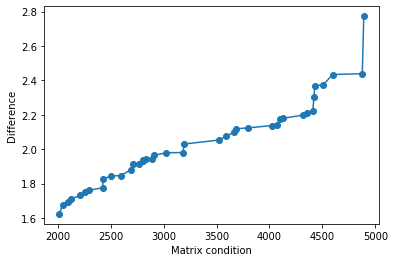

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(sorted([x[0] for x in diff]), sorted([x[1]for x in diff]), marker='o')

ax.set_xlabel('Matrix condition')
ax.set_ylabel('Difference')

plt.show()

Za przyczynę wykazanych rozbieżności można uznać ograniczoną dokładność obliczeń zmiennoprzecinkowych. Widzimy, że dla macierzy o gorszym uwarunkowaniu numerycznym generujemy dekompozycję obarczoną większym błędem. 

## Rozwiązywanie układów równań 

In [28]:
def solve(A,B):
    Q,R = np.linalg.qr(A)
    return np.linalg.solve(R, np.linalg.inv(Q.T @ Q) @ Q.T @ B)

### Przykładowe zadanie - dopasowanie paraboli (układ nadokreślony)

In [29]:
B = np.array([2,7,9,12,13,14,14,13,10,8,4]).reshape((11,1))
B

array([[ 2],
       [ 7],
       [ 9],
       [12],
       [13],
       [14],
       [14],
       [13],
       [10],
       [ 8],
       [ 4]])

In [30]:
A = np.array([[1,x,x*x] for x in [-5,-4,-3,-2,-1,0,1,2,3,4,5]])
A

array([[ 1, -5, 25],
       [ 1, -4, 16],
       [ 1, -3,  9],
       [ 1, -2,  4],
       [ 1, -1,  1],
       [ 1,  0,  0],
       [ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  4, 16],
       [ 1,  5, 25]])

In [31]:
x = solve(A,B)
x

array([[13.97202797],
       [ 0.18181818],
       [-0.43356643]])

In [36]:
A @ x 

array([[ 2.22377622],
       [ 6.30769231],
       [ 9.52447552],
       [11.87412587],
       [13.35664336],
       [13.97202797],
       [13.72027972],
       [12.6013986 ],
       [10.61538462],
       [ 7.76223776],
       [ 4.04195804]])

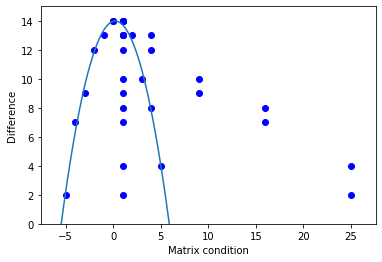

In [32]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(A,B,'bo')

ax.set_xlabel('Matrix condition')
ax.set_ylabel('Difference')
plt.ylim(0, 15)

par_x = np.linspace(-6, 26, 1000)
par_y = x[2]*par_x**2 + x[1]*par_x + x[0]  
ax.plot(par_x, par_y)

plt.show()